In [2]:
import numpy as np
import matplotlib.pyplot as plt
import KID
import kidcalc as kc
import SC

import importlib

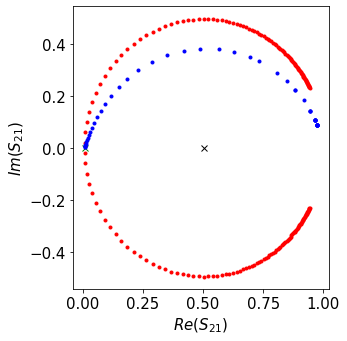

In [35]:
plt.rcParams.update({'font.size': 15})

importlib.reload(KID)
importlib.reload(kidcalc)
importlib.reload(SC)

k = KID.KID()
# k.plot_resp(-6.528e-4*2*np.pi*3e8/(402*1e-3),plot='S21')
k.plot_resp(6.528e-4*2*np.pi*3e8/(1*1e-3),plot='S21')

plt.tight_layout()
# datafld = 'C:\\Users\\Steven\\Google Drive\\AP\\Thesis\\Presentation\\figs\\'
# plt.savefig(datafld+'S21circleNoise.pdf')

In [36]:
k.Qi_0, k.Qc, k.Q_0

(2384315.560681181, 20000.0, 19833.632487123832)

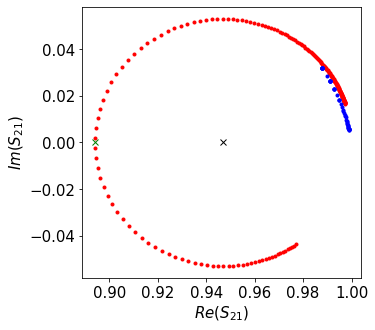

In [46]:
k.kbT = .6 * 86.17
k.plot_resp(6.528e-4*2*np.pi*3e8/(1e-5),plot='S21')


In [44]:
k.Qi_0, k.Qc, k.Q_0

(2366.1839202902347, 20000.0, 2115.858412613402)

In [46]:
importlib.reload(kc)
kbT0 = 86.17 * .1 #µeV
f0 = 5e9 #Hz
hw0 = 6.528e-4*2*np.pi*f0*1e-6 #µeV
Qi_sat = 1e13
Qc = 1e4
V = 10 #µm^3
supercond = SC.bTa()
ak = .9
beta = 2


lmbda = 1545 #nm
etapb = .59
dNqp = etapb * 6.528e-4*2*np.pi* 3e8 / (lmbda * 1e-3) / supercond.D0
Nqp0 = V * kc.nqp(kbT0, D, supercond)
kbTeff = kc.kbTeff((Nqp0 + dNqp)/V, supercond)

s10, s20 = kc.cinduct(hw0, supercond.D0, kbT0)
Qi_Nqp0 = 2/(ak*beta) * s20/s10
Qi0 = Qi_Nqp0 * Qi_sat / (Qi_Nqp0 + Qi_sat)
Lk0 = np.imag(1/(s10-1j*s20))/(2*np.pi*f0)

kbTarr = np.logspace(np.log10(kbT0), np.log10(kbTeff), 100)
s1, s2 = np.zeros((2, len(kbTarr)))
for i, kbT in enumerate(kbTarr):
    s1[i], s2[i] = kc.cinduct(hw0, supercond.D0, kbT)

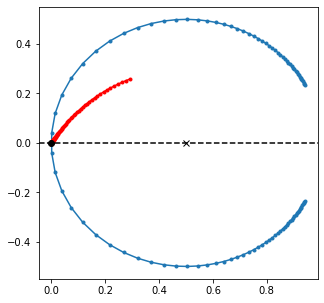

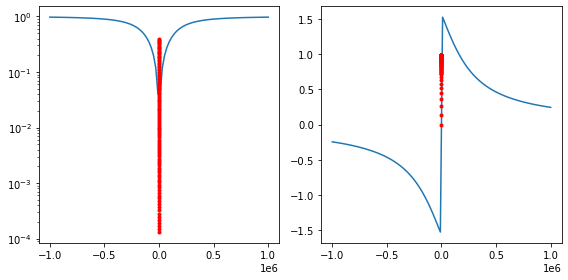

In [45]:

#Make a 
Q = Qc * Qi0 / (Qc + Qi0)
df_sweep = np.linspace(-2*f0/Q, 2*f0/Q, 100)

S21 = kc.S21(Qi0, Qc, f0, df_sweep, f0)

Qi_Nqp = 2/(ak*beta) * s2/s1
Qiresp = Qi_Nqp * Qi_sat / (Qi_Nqp + Qi_sat)
C = ak/(f0**2*Lk0)
Lk = np.imag(1/(s1-1j*s2))/(2*np.pi*f0)
fresp = 1/np.sqrt(C*Lk/ak)
S21resp = kc.S21(Qiresp, Qc, f0, 0, fresp)
# detune = f0/Q*.5
# S21resp2 = kc.S21(Qiresp, Qc, f0, detune , fresp)
# S21resp3 = kc.S21(Qiresp, Qc, f0, -detune, fresp)

plt.figure(figsize=(5, 5))
plt.plot(S21.real, S21.imag, '.-')
plt.plot(S21resp.real, S21resp.imag, '.-', color='r')
# plt.plot(S21resp2.real, S21resp2.imag, '.-', color='y')
# plt.plot(S21resp3.real, S21resp3.imag, '.-', color='g')
plt.plot(Q/Qi0, 0, 'ko')
plt.plot((1 + Q/Qi0)/2, 0, 'kx')
# plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')


fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(df_sweep, np.abs(S21))
axs[0].plot(np.zeros(len(kbTarr)), np.abs(S21resp), 'r.')
axs[0].set_yscale('log')
axs[1].plot(df_sweep, np.angle(S21))
axs[1].plot(np.zeros(len(kbTarr)), np.angle(S21resp), 'r.')
fig.tight_layout()

In [40]:
Qiresp

array([6.50511786e+06, 5.88737720e+06, 5.33181368e+06, 4.83187693e+06,
       4.38168548e+06, 3.97602564e+06, 3.61025610e+06, 3.28024234e+06,
       2.98229893e+06, 2.71313866e+06, 2.46982762e+06, 2.24974554e+06,
       2.05055087e+06, 1.87014987e+06, 1.70666872e+06, 1.55843016e+06,
       1.42393146e+06, 1.30182554e+06, 1.19090411e+06, 1.09008275e+06,
       9.98387571e+05, 9.14943490e+05, 8.38963698e+05, 7.69740356e+05,
       7.06636294e+05, 6.49076226e+05, 5.96545764e+05, 5.48577133e+05,
       5.04750916e+05, 4.64684546e+05, 4.28036287e+05, 3.94496050e+05,
       3.63783446e+05, 3.35644787e+05, 3.09850414e+05, 2.86192316e+05,
       2.64481983e+05, 2.44548488e+05, 2.26236763e+05, 2.09406053e+05,
       1.93928526e+05, 1.79688029e+05, 1.66578963e+05, 1.54505276e+05,
       1.43379545e+05, 1.33122181e+05, 1.23660673e+05, 1.14928928e+05,
       1.06866677e+05, 9.94189319e+04, 9.25354971e+04, 8.61705309e+04,
       8.02821460e+04, 7.48320508e+04, 6.97852228e+04, 6.51096135e+04,
      